In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import QTable

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
pyirf_file = '../build/pyirf.fits.gz' 

sensitivity = QTable.read(pyirf_file, hdu='SENSITIVITY')[1:-1]

# make it print nice
sensitivity['reco_energy_low'].info.format = '.3g'
sensitivity['reco_energy_high'].info.format = '.3g'
sensitivity['reco_energy_center'].info.format = '.3g'
sensitivity['relative_sensitivity'].info.format = '.2g'
sensitivity['flux_sensitivity'].info.format = '.3g'

for k in filter(lambda k: k.startswith('n_'), sensitivity.colnames):
    sensitivity[k].info.format = '.1f'

sensitivity

reco_energy_low,reco_energy_high,reco_energy_center,n_signal,n_signal_weighted,n_background,n_background_weighted,n_electron,n_electron_weighted,n_proton,n_proton_weighted,significance,relative_sensitivity,flux_sensitivity
TeV,TeV,TeV,,,,,,,,,,,1 / (cm2 s TeV)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0126,0.02,0.0163,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,nan,inf,inf
0.02,0.0316,0.0258,0.3,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.986250026900071,0.11,4.49e-08
0.0316,0.0501,0.0409,27.5,614.8,34.8,61484.8,29.8,3501.0,5.0,57983.8,5.013272146875557,0.087,1.07e-08
0.0501,0.0794,0.0648,25.2,406.8,49.4,26803.2,46.1,3555.1,3.2,23248.1,5.000000000000955,0.038,1.41e-09
0.0794,0.126,0.103,34.0,530.0,69.3,45798.5,64.6,4285.7,4.6,41512.8,4.999999999997703,0.018,2.04e-10
0.126,0.2,0.163,39.2,487.5,160.3,38664.4,156.2,7170.8,4.1,31493.6,4.999999999999465,0.0075,2.49e-11
0.2,0.316,0.258,47.1,438.8,212.5,31242.0,208.3,5958.5,4.3,25283.5,5.000000000000284,0.0057,5.66e-12
0.316,0.501,0.409,73.3,523.7,358.7,44699.9,351.1,6524.7,7.6,38175.2,4.999999999999568,0.0056,1.65e-12


In [4]:
sensitivity_unop = QTable.read(pyirf_file, hdu='SENSITIVITY_UNOP')[1:-1]

In [5]:
sensitivity_magic = QTable.read('magic_sensitivity_2014.ecsv')

sensitivity_magic

e_max,e_min,background_rate,background_rate_err,gamma_rate,gamma_rate_err,sensitivity_lima_1off,sensitivity_lima_1off_err,sensitivity_lima_3off,sensitivity_lima_3off_err,sensitivity_lima_5off,sensitivity_lima_5off_err,sensitivity_snr,sensitivity_snr_err,e_center,e_err_lo,e_err_hi
GeV,GeV,1 / min,1 / min,1 / min,1 / min,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),GeV,GeV,GeV
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100.0,63.0,4.06,0.08,3.01,0.13,7.601958508074096e-10,3.455435685488226e-11,6.1333983417416e-10,2.5915767641161692e-11,5.874240665329984e-10,2.5915767641161692e-11,7.3e-10,3e-11,79.37253933193772,16.372539331937716,20.627460668062284
158.0,100.0,2.41,0.06,4.29,0.12,1.650780087464995e-10,4.845056860484262e-12,1.339312146433864e-10,3.806830390380492e-12,1.270097048426946e-10,3.460754900345902e-12,1.37e-10,5e-12,125.69805089976535,25.69805089976535,32.30194910023465
251.0,158.0,0.54,0.03,3.37,0.08,3.910257867777991e-11,1.325511141619658e-12,3.154716517054787e-11,1.0604089132957266e-12,2.982400068644231e-11,1.0604089132957266e-12,3.05e-11,1.3000000000000001e-12,199.14316458266902,41.143164582669016,51.856835417330984
398.0,251.0,0.066,0.01,1.36,0.05,1.3547361416709163e-11,9.67668672622083e-13,1.0450821664318497e-11,7.741349380976664e-13,9.821837027114142e-12,7.257515044665623e-13,9.300000000000001e-12,8e-13,316.066448709761,65.066448709761,81.933551290239
631.0,398.0,0.027,0.006,1.22,0.04,3.5556881058906414e-12,3.047732662191978e-13,2.7260275478494916e-12,3.047732662191978e-13,2.556709066616604e-12,2.539777218493315e-13,2.3e-12,3e-13,501.13670789516107,103.13670789516107,129.86329210483893
1000.0,631.0,0.0133,0.0018,0.88,0.04,1.2365835413508895e-12,6.806881878995721e-14,9.30273856796082e-13,5.105161409246791e-14,8.678774395719544e-13,6.239641722412745e-14,7.2e-13,6e-14,794.35508432942,163.35508432942004,205.64491567057996
1585.0,1000.0,0.0059,0.0007,0.58,0.03,4.5104238659926285e-13,2.0005912308838273e-14,3.2736947414462623e-13,1.6368473707231312e-14,3.0190740393337754e-13,1.6368473707231312e-14,2.3000000000000003e-13,1.8e-14,1258.967831201417,258.9678312014171,326.0321687985829
2512.0,1585.0,0.0027,0.0005,0.3,0.02,2.1199333369145533e-13,1.115754387849765e-14,1.4504807042046943e-13,1.0599666684572767e-14,1.3165901776627226e-13,1.0041789490647884e-14,9e-14,1e-14,1995.374651537901,410.37465153790095,516.625348462099


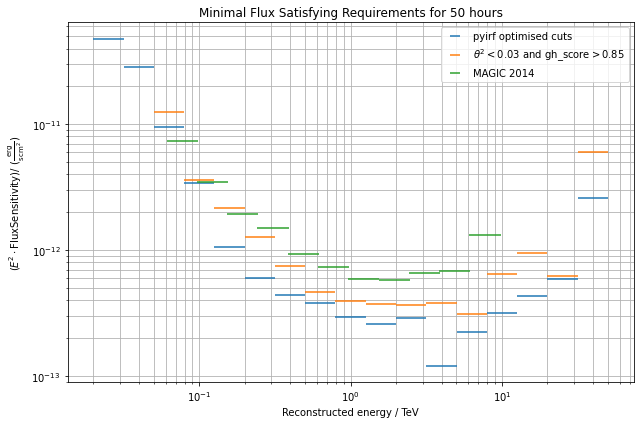

In [6]:
unit = u.Unit('erg cm-2 s-1')

for s, label in zip(
    [sensitivity, sensitivity_unop], ['pyirf optimised cuts', r'$\theta^2 < 0.03$ and gh_score$> 0.85$']
):
    e = s['reco_energy_center']
    w = (s['reco_energy_high'] - s['reco_energy_low'])
    s = (e**2 * s['flux_sensitivity'])

    plt.errorbar(
        e.to_value(u.TeV),
        s.to_value(unit),
        xerr=w.to_value(u.TeV) / 2,
        ls='',
        label=label
    )

e_magic = sensitivity_magic['e_center']
w_magic = (sensitivity_magic['e_max'] - sensitivity_magic['e_min'])
s_magic = (e_magic**2 * sensitivity_magic['sensitivity_snr'])

plt.errorbar(
    e_magic.to_value(u.TeV),
    s_magic.to_value(unit),
    xerr=w_magic.to_value(u.TeV) / 2,
    ls='',
    label='MAGIC 2014'
)

plt.title('Minimal Flux Satisfying Requirements for 50 hours')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Reconstructed energy / TeV")
plt.ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")

plt.grid(which='both')
plt.legend()
plt.tight_layout()

None